In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
import os, time
import itertools, imageio, pickle

import numpy as np
from numpy import array
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
print(tf.__version__)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import imageio

run_opts = tf.RunOptions(report_tensor_allocations_upon_oom = True)

Instructions for updating:
non-resource variables are not supported in the long term
2.3.0


In [4]:
import sys
sys.path.append('../Python_Files')

from helper_functions import *
from feedforward_autoencoder import *
from convolutional_autoencoder import *
from gan import *

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
2.3.0


In [5]:
tpu = tf.distribute.cluster_resolver.TPUClusterResolver() # TPU detection
tf.tpu.experimental.initialize_tpu_system(tpu)
strategy = tf.distribute.experimental.TPUStrategy(tpu, steps_per_run=128)

# **1. Feedforward autoencoder**

### **1.1 Hyperparameters**

In [6]:
# Data parameters
input_size = 512*512
output_size = 512*512


# Following Hinton-Salakhutdinov Architecture with 3 hidden layers for encoder and decoder 
encoder_neurons = [1000, 750,500,250]
decoder_neurons = [250,500,750, 1000]
n_code = 250

# Hyperparameters
learning_rate = 1.6
training_epochs = 300
batch_size = 100
display_step = 2

### **1.2 Autoencoder function call**

In [7]:
data = load_all_images(222,1, 512)

50
100
150
200
final_shape (222, 512, 512)


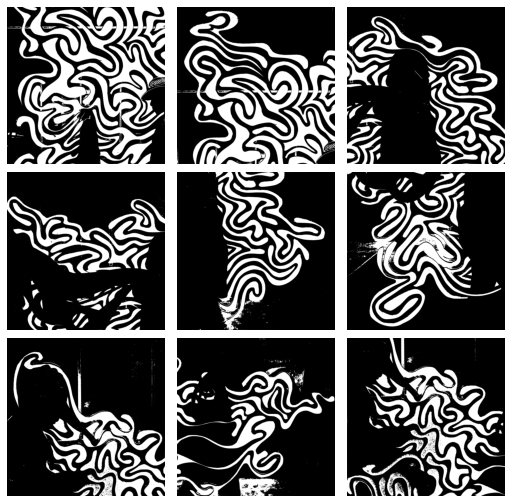

In [9]:
f2 = plot_sample(data[60:69], 3, 3)

In [10]:
# in practice, it was trained for 500 epochs, with a learning rate of 0.0005 on a VM
results = ff_autoencoder(data, '../ResultsAE1_',input_size,output_size, n_code, encoder_neurons, decoder_neurons,0.0005, 5, batch_size, display_step)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch: 0001 cost = 270.813400269
Model saved in file: ../ResultsAE1_
Epoch: 0003 cost = 267.720489502
Model saved in file: ../ResultsAE1_
Epoch: 0005 cost = 263.925018311
Model saved in file: ../ResultsAE1_
Optimization Done 


# **Convolutional AE**

In [11]:
data_conv_ae = load_all_images(222,1, 512).reshape(222,512,512,1)

50
100
150
200
final_shape (222, 512, 512)


[5, 5, 1, 32]
[5, 5, 32, 64]
[5, 5, 64, 128]
[5, 5, 128, 256]
Epoch: 0001 cost = 17.246033033
Epoch: 0011 cost = 6.653423071
Epoch: 0021 cost = 5.890565475
Epoch: 0031 cost = 5.387113094
Epoch: 0041 cost = 5.252188365
Optimization Done


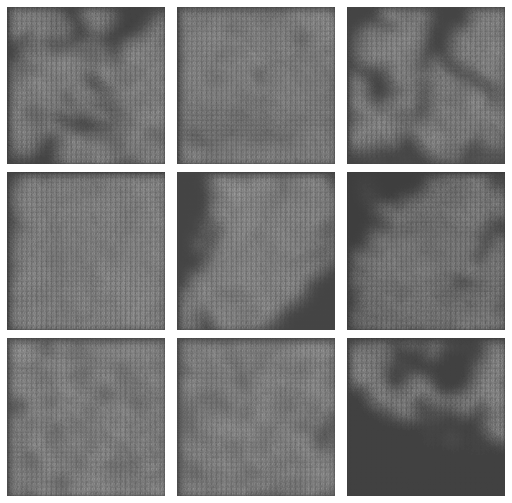

In [21]:
display_step = 10
s = convolutional_autoencoder_(data_conv_ae, 32,51, 0.0008)

# **GAN**

In [12]:
# Generator variables 
size_g_w1 = 100
size_g_b1 = 800
size_g_w2 = 800
size_g_b2 = 512*512

# Discriminator variables
size_d_w1 = 512*512
size_d_b1 = 800
size_d_w2 = 800
size_d_b2 = 1

# General variables 
batch_size = 128
z_dim = 100 # dimension of the random samples
figure_iter = 500
max_iter = 75000
learning_rate = 0.00025

In [14]:
data = load_all_images(222,3, 512)

50
100
150
200
250
300
350
400
450
500
550
600
650
final_shape (666, 512, 512)


In [16]:
train_GAN(data, size_g_w1, size_g_b1, size_g_w2, size_g_b2, learning_rate,batch_size,z_dim,max_iter)

iteration: 0
D_loss: 1.6412175
G_loss: 650.9242

iteration: 1000
D_loss: 11.155062
G_loss: 28.261295

iteration: 2000
D_loss: 0.08122346
G_loss: 4.1364985

iteration: 3000
D_loss: 0.06963357
G_loss: 4.9184914

iteration: 4000
D_loss: 0.27130812
G_loss: 4.1168447

iteration: 5000
D_loss: 0.7267289
G_loss: 4.2762804

iteration: 6000
D_loss: 0.15516055
G_loss: 2.9515905

iteration: 7000
D_loss: 0.118261606
G_loss: 4.0920763

iteration: 8000
D_loss: 0.14941078
G_loss: 11.430259

iteration: 9000
D_loss: 3.002005
G_loss: 344.87698

iteration: 10000
D_loss: 7.186654
G_loss: 54.561283

iteration: 11000
D_loss: 49.68732
G_loss: 21.899588

iteration: 12000
D_loss: 1.1653756
G_loss: 39.776253

iteration: 13000
D_loss: 14.754505
G_loss: 17.020638

iteration: 14000
D_loss: 5.392075
G_loss: 19.100395

iteration: 15000
D_loss: 1.6800864
G_loss: 27.970638

iteration: 16000
D_loss: 1.5801241
G_loss: 16.742222

iteration: 17000
D_loss: 1.4661864
G_loss: 8.834651

iteration: 18000
D_loss: 0.48109818
G_lo